In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## 선형회귀 (Linear Regression)

먼저, 주어진 데이터를 직선을 사용해 모델링하는 방법을 살펴본다. 직선함수는 다음과 같은 형태를 가진다.
$$
y = ax + b
$$
여기서 $a$는 기울기 (*slope*)이고 $b$는 $y$절편 (*intercept*)라고 불린다.

아래 그래프는 기울기가 2이고 $y$절편이 -5인 직선으로부터 생성된 데이터를 보여준다

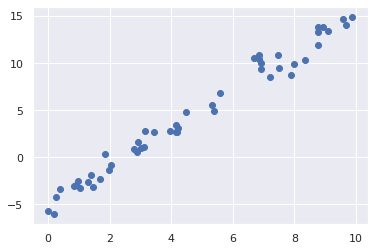

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50) # 직선함수에 랜덤한 노이즈 추가
plt.scatter(x, y);

Scikit-Learn의 ``LinearRegression`` estimator를 사용해서 위 데이터를 가장 잘 표현하는 직선을 찾을 수 있다.

In [4]:
x.shape # 1차원

(50,)

In [5]:
x[:, np.newaxis].shape # 2차원으로 차원 늘리기(열벡터화)

(50, 1)

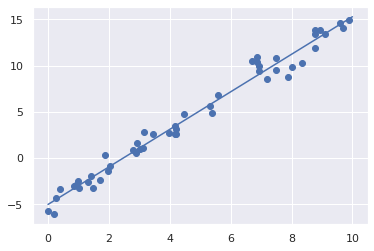

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)  #학습데이터 x, label 데이터 y

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

모델 학습이 끝난 후 학습된 파라미터들은 model."파라미터이름"_ 의 형태로 저장된다. 기울기와 y절편은 아래와 같이 출력할 수 있다.

In [12]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


``LinearRegression`` estimator는 위의 예제와 같은 1차원 입력뿐만 아니라 다차원 입력을 사용한 선형모델을 다룰 수 있다. 다차원 선형모델은 다음과 같은 형태를 가진다.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
기하학적으로 이것은 hyper-plane으로 데이터를 표현하는 것이라고 말할 수 있다.

In [17]:
rng = np.random.RandomState(1)
rng.rand(100, 3).shape
X = 10 * rng.rand(100, 3)  # 100x3 행렬 0~10 (*10)
np.dot(X, [1.5, -2., 1.]).shape # 100-열벡터

(100,)

In [20]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # 2차원 이상의 행렬사용 시, 대문자 X
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


$y$값들은 랜덤하게 생성된 3차원의 $x$값과 계수들([1.5, -2., 1.])을 곱함으로써 생성되었는데, linear regression을 통해서 이 계수들을 계산해낼 수 있다는 것을 알 수 있다.

만약 데이터가 선형적인 관계를 가지고 있지 않다면?

## 선형 기저함수 모델 (Linear Basis Function Models)

비선형데이터를 선형함수로 모델링하는 한가지 방법은 기저함수(basis function)을 사용하는 것이다.

예를 들어, 다음과 같은 선형함수를 사용한다고 하자.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
여기서 $x_1, x_2, x_3,$등을 1차원 $x$로부터 생성할 수 있다($x_n = f_n(x)$). $f_n$을 기저함수(basis function)라고 부른다.

만약 $f_n(x) = x^n$라는 기저함수를 사용하면 최종적인 모델은 다음과 같을 것이다.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

이 모델은 여전히 계수($a_n$)에 관해서는 선형함수임을 기억하자. 따라서 1차원 변수인 $x$를 기저함수를 통해 다차원으로 확장시킴으로써 우리는 여전히 선형모델(linear regression)을 사용할 수 있게 된다.

### 다항 기저함수 (Polynomial Basis Functions)

$f_n(x) = x^n$ 형태의 함수를 다항 기저함수 (polynomial basis functions)라고 부른다. Scikit-Learn은 ``PolynomialFeatures``이라는 transformer를 이미 포함하고 있다.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

PolynomialFeatures가 1차원 array를 3차원 array로 변환한 것을 볼 수 있다. 이렇게 변환된 데이터를 선형모델에 적용할 수 있다.

7차원 변환을 적용해보자.

In [22]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), # 데이터 변환시킴
                           LinearRegression()) # 결과에 대하여 선형회귀

다차원 변환을 사용하면 복잡한 데이터를 모델링할 수 있게 된다. 예를 들어 sine 함수를 사용해서 데이터를 생성하고 모델링해보자.

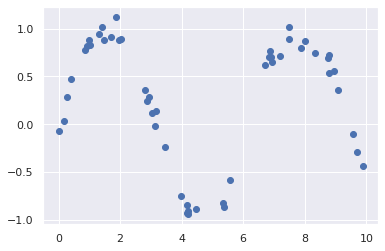

In [24]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)  # sin 함수
plt.scatter(x, y)

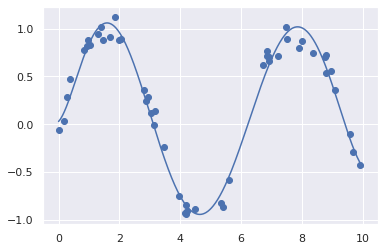

In [30]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### 가우시안 기저함수 (Gaussian Basis Functions)

다항 기저함수 외에 다른 기저함수를 사용해보자. 가우시안 기저함수는 다음과 같이 정의된다.

$$\exp \{-\frac{(x-u_j)^2}{2s^2}\}$$

$u_j$는 함수의 위치, $s$는 폭을 결정한다. 주어진 데이터를 여러 개의 가우시안 기저함수들의 합으로 표현하려고 시도할 수 있다.

![](images/05.06-gaussian-basis.png)

그래프 아래 회색부분은 다수의 가우시안 기저함수들을 보여주고 있다. 이 기저함수들의 합은 데이터를 가로지르는 매끈한 곡선이 된다.

가우시안 기저함수는 Scikit-Learn에 포함되어 있지 않지만 어렵지 않게 구현할 수 있다.

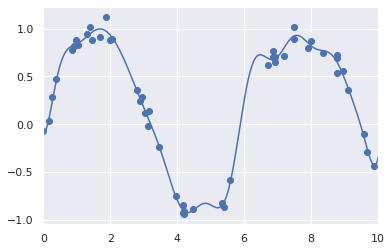

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), # 20개의 가우시안 기저함수
                            LinearRegression()) # 결과에 대한 선형회귀
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10); # over-fitting

## 규제화 (Regularization)

기저함수를 사용함으로써 복잡한 데이터를 모델링할 수 있게 되었지만 조심하지 않는다면 over-fitting이라는 다른 심각한 문제를 만날 수 있다! 예를 들어, 너무 많은 개수의 가우시안 기저함수를 사용하게 되면 다음과 같이 될 수 있다.

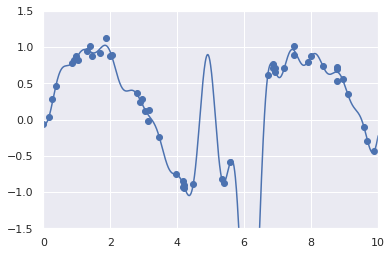

In [34]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

이 예제에서는 30개의 기저함수가 사용되었는데 모델이 필요이상으로 flexible해져서 데이터가 없는 곳에서는 극단적인 값을 가지는 것을 볼 수 있다. 기저함수의 계수들은 다음과 같이 확인할 수 있다.

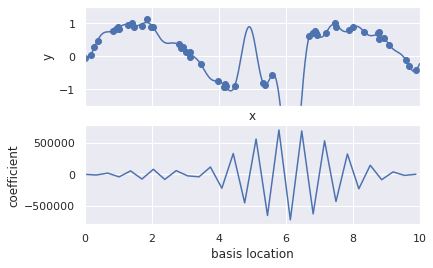

In [36]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

위 두번째 그래프는 각각의 가우시안 기저함수의 크기(계수값)을 보여주고 있다. Over-fitting이 일어나는 영역에서는 인접한 기저함수들의 값이 극단으로 가면서 서로 상쇄하는 현상이 일어난다. 따라서 큰 계수값에 대해 penalty를 부여해서 over-fitting을 어느 정도 극복할 수 있을 것이다. 이러한 penalty를 *regularization*이라 부른다.

### Ridge regression ($L_2$ Regularization)

가장 자주 쓰이는 형태의 regularization은 *ridge regression* ($L_2$ *regularization*)이고 다음과 같이 정의된다.
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
여기서 $\alpha$는 regularization의 강도를 조절하는 파라미터이다. 이 형태의 regularization은 Scikit-Learn의 ``Ridge`` estimator에서 사용된다.

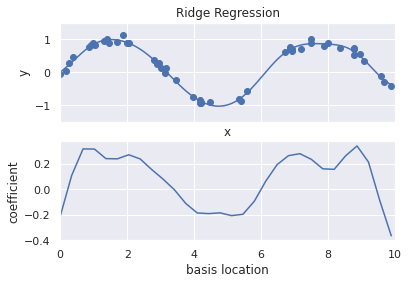

In [37]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

$\alpha$값이 0에 가까워질수록 일반적인 선형회귀모델이 되고 $\alpha$값이 무한대로 증가하면 데이터는 모델에 영향을 주지 않게 된다.

### Lasso regression ($L_1$ regularization)

또 하나의 자주 쓰이는 regularization방법은 계수들의 절대값의 합을 제한하는 것이다.
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
뒤에서 자세히 다루겠지만 이 방법은 *sparse*한 모델을 생성하게 된다(많은 계수들이 0이 됨).

/home/hyun/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870488944, tolerance: 0.002065280097246271
  positive)


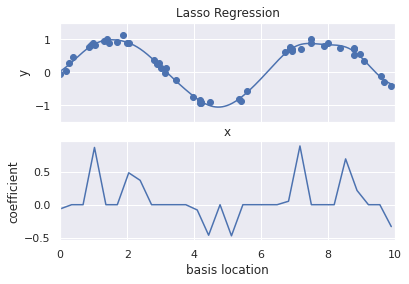

In [43]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

위에서 볼 수 있듯 대부분의 계수값들이 0이 된다. Ridge regression과 마찬가지로 $\alpha$값으로 regularization의 강도를 조절할 수 있다.

### SGD

/home/hyun/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


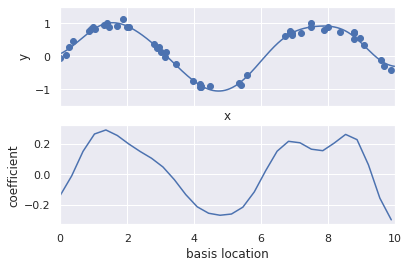

In [44]:
from sklearn.linear_model import SGDRegressor
model = make_pipeline(GaussianFeatures(30),
                      SGDRegressor(max_iter=1000, tol=1e-8, alpha=0))
basis_plot(model)